**<h1>Статистический анализ данных сервиса аренды самокатов GoFast**

**Описание проекта**

Проанализируем данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки 
1. абонентская плата отсутствует;
2. стоимость одной минуты поездки — 8 рублей;
3. стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra 
1. абонентская плата — 199 рублей в месяц;
2. стоимость одной минуты поездки — 6 рублей;
3. стоимость старта — бесплатно.

**Цель проекта**

Провести статистический анализ данных, проверить гипотезы для роста бизнеса (сервиса аренды самокатов GoFast).

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

- user_id	- уникальный идентификатор пользователя
- name - имя пользователя
- age	- возраст
- city	- город
- subscription_type	- тип подписки (free, ultra)

Поездки — rides_go.csv
- user_id	- уникальный идентификатор пользователя
- distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	- дата совершения поездки

Подписки — subscriptions_go.csv
- subscription_type	- тип подписки
- minute_price	- стоимость одной минуты поездки по данной подписке
- start_ride_price	- стоимость начала поездки
- subscription_fee	- стоимость ежемесячного платежа

**План работы**
1. Загрузка данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Объединение данных;
5. Подсчёт выручки;
6. Проверка гипотез.

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

**1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.**

In [3]:
users_go=pd.read_csv('/datasets/users_go.csv')
rides_go=pd.read_csv('/datasets/rides_go.csv')
subscriptions_go=pd.read_csv('/datasets/subscriptions_go.csv')

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: '/datasets/users_go.csv'

**1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.**

In [ ]:
display(users_go.head())
display(users_go.info())
display(users_go.duplicated().sum())

In [ ]:
display(rides_go.head())
display(rides_go.info())
display(rides_go.duplicated().sum())

In [ ]:
display(subscriptions_go.head())
display(subscriptions_go.info())
display(subscriptions_go.duplicated().sum())

**Вывод:**

В результате изучения общей информации о данных, выяснили, что:

- users_go содержит 1565 строк, пропуски отсутствуют, количество явных дубликатов 31;

- rides_go содержит 18068 строк, пропуски отсутствуют, явных дубликатов нет;

- subscriptions_go содержит 2 строки, пропуски отсутствуют, явных дубликатов нет.

#### Шаг 2. Предобработка данных

**2.1 Приведем столбец date к типу даты pandas.**

In [ ]:
rides_go['date']=pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

**2.2 Создадим новый столбец с номером месяца на основе столбца date.**

In [ ]:
rides_go['month']=rides_go['date'].dt.month

**2.3 Удалим дубликаты, содержащиеся в users_go.**

In [ ]:
users_go.drop_duplicates(inplace=True)


**Вывод:**

Выполнили предобработку данных, в результате которой:

- привели столбец date к типу даты pandas;

- создали новый столбец с номером месяца на основе столбца date;

- удалили строки дубликаты, содержащиеся в users_go.

#### Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках:**

**3.1 Частота встречаемости городов**

In [ ]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count')\
.sort_values(by='user_id', ascending=True).plot(kind='barh', grid=True, figsize=(10,5));
plt.title('Численность пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Численность пользователей') 
plt.show()
print('Численность пользователей в городах', users_go.pivot_table(index='city',\
values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False))


**Вывод:**

Лидером по количеству пользователей является город Пятигорск(219 пользователей), за ним следует Екатеринбург(204 пользователя), следом Ростов-на-Дону(198 пользователей), за ним Краснодар(193 пользователя) и Сочи(189 пользователей). Замыкают список городов по количетсву пользователей Омск(183 пользователя), Тюмень(180 пользователей) и Москва(168 пользователей).

**3.2 Соотношение пользователей с подпиской и без подписки**

In [ ]:
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')\
.plot.pie(y='user_id', figsize=(5,5),  label='Количество пользователей', autopct='%1.1f%%', 
title='Соотношение пользователей `free` - без подписки, `ultra` - с подпиской', colors=('g', 'y'));

**Вывод:**

По круговой диаграмме видим, что количество пользователей без подписки составляет 54,4%, что больше чем пользователи с подпиской, на которых приходится 45,6%.

**3.3 Возраст пользователей**

In [ ]:
users_go.pivot_table(index='age', values='user_id', aggfunc='count')\
.sort_values(by='age', ascending=True).plot(kind='bar', grid=True, figsize=(10,5));
plt.title('Количество пользователей в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation = 0)
plt.show()
print('Среднее значение возраста пользователей', users_go['age'].mean().round(2))
users_go['age'].describe()

**Вывод:**

В результатее построенной диаграммы видим, что возраст пользователей распределён близко к нормальному, с медианой в 25 лет, что почти совпадает со средним значением возраста - 24.9. Первый квартиль находится на значении 22 года а третий квартиль на значении 28 лет. Таким образом, межквартильный размах составляет 8 лет.

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [ ]:
rides_go['distance'].describe()

In [ ]:
plt.hist(rides_go['distance'], bins=100, range=(1,6000));
plt.title('Число поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Число поездок')
plt.show()

**Вывод:**

Средняя дистанция, преодолеваемая пользователем за одну поездку составляет 3133 метра. На гистограмме видим основной 'холм', где среднее как раз составляет 3133 метра, а так же небольшой пик на 700 метрах. Первый квартиль принимает значение 2543,22 метра, третий квартиль - 3776,22 метра. Межквартильный размах составляет 1233 метра.

**3.5 Продолжительность поездок**

In [ ]:
rides_go['duration'].describe()

In [ ]:
plt.hist(rides_go['duration'], bins=41, range=(1,41));
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество поездок')
plt.show()

**Вывод:**

Средняя продолжительность поездок составляет 18 минут, большинство пользователей тратят на поездку от 13 до 18 минут. Данные распределены близко к нормальному распределению. Первый квартиль принимает значение 13,6 минут, третий квартиль - 21,7 минут. Межквартильный размах составляет 8,1 мин.

**Провели исследовательский анализ данных, в результате которого выяснили:**

- Лидером по количеству пользователей является город Пятигорск(219 пользователей), за ним следует Екатеринбург(204 пользователя), следом Ростов-на-Дону(198 пользователей), за ним Краснодар(193 пользователя) и Сочи(189 пользователей). Замыкают список городов по количетсву пользователей Омск(183 пользователя), Тюмень(180 пользователей) и Москва(168 пользователей).

- По круговой диаграмме установили, что количество пользователей без подписки составляет 54,4%, что больше чем пользователи с подпиской, на которых приходится 45,6%.

- В результатее построенной диаграммы видим, что возраст пользователей распределён близко к нормальному, с медианой в 25 лет, что почти совпадает со средним значением возраста - 24.9. Первый квартиль находится на значении 22 года а третий квартиль на значении 28 лет. Таким образом, межквартильный размах составляет 8 лет.

- Средняя дистанция, преодолеваемая пользователем за одну поездку составляет 3133 метра. На гистограмме видим основной 'холм', где среднее как раз составляет 3133 метра, а так же небольшой пик на 700 метрах. Первый квартиль принимает значение 2543,22 метра, третий квартиль - 3776,22 метра. Межквартильный размах составляет 1233 метра.

- Средняя продолжительность поездок составляет 18 минут, большинство пользователей тратят на поездку от 13 до 18 минут. Данные распределены близко к нормальному распределению. Первый квартиль принимает значение 13,6 минут, третий квартиль - 21,7 минут. Межквартильный размах составляет 8,1 мин.

#### Шаг 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().**

In [ ]:
data=users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
data.head()


In [ ]:
print("Количество строк (поездок) в 'rides_go':", rides_go['user_id'].count())
print("Количество строк (поездок) в 'data':", data['user_id'].count())
print("Количество пользователей в 'users_go':", len(users_go['user_id'].unique()))
print("Количество пользователей в 'data':", len(data['user_id'].unique()))
data.isnull().sum().sum()

**Размерность до объединения и после у полученной таблицы соответствуют, пропущенные значения после объединения отсутствуют.**

**4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:**

**- c данными о пользователях без подписки**

In [ ]:
data_free=data[data['subscription_type']=='free']
if (data_free.isnull().sum().sum()) == 0:
    print('Пропуски отсутствуют')
else:
    print('Внимание! Пропуски!')

**- c данными о пользователях c подпиской**

In [ ]:
data_ultra=data[data['subscription_type']=='ultra']
if (data_ultra.isnull().sum().sum()) == 0:
    print('Пропуски отсутствуют')
else:
    print('Внимание! Пропуски!')

In [ ]:
if len(data) == (len(data_free) + len(data_ultra)):
    print('Размерность таблиц совпадает')
else:
    print('Размерность таблиц не совпадает')

**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

In [ ]:
data_free['distance'].describe().round(2)

In [ ]:
data_ultra['distance'].describe().round(2)

In [ ]:
data_free['duration'].describe().round(2)

In [ ]:
data_ultra['duration'].describe().round(2)

In [ ]:
plt.hist([data_free['distance'], data_ultra['distance']], bins=50, range=(1,6000));
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
plt.hist([data_free['duration'], data_ultra['duration']], bins=50, range=(1,30));
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

**В результате объединения данных получили:**

Визуализация созданных датафреймов показывает, что подписка пользователей оказывает влияние на расстояние и время
поездок, однако незначительно, поскольку с подпиской среднее время 18 минут и расстояние 3148 метров, а без подписки 17 минут и 3114 метров соответственно.


#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        
Стоит выполнить округление длительности до агрегации данных
        
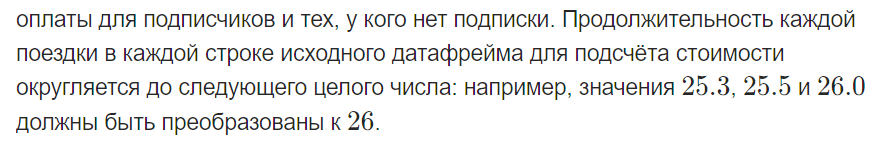        
        

In [ ]:
data['duration'] = np.ceil(data['duration'])

In [ ]:
data_general = data.pivot_table(index=('user_id', 'month'), values=('distance', 'duration', \
'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type'),\
aggfunc=({'distance':{'count','sum'}, 'duration':'sum', \
'minute_price':'mean', 'start_ride_price':'mean', 'subscription_fee':'mean',\
'subscription_type':'min'}))
data_general.columns = ['count', 'distance', 'duration', 'minute_price','start_ride_price', \
'subscription_fee', 'subscription_type']
data_general.head()



<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Широкие строки кода рекомендуется делить на всем проекте
        
<a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        
Стоит проверить агрегированные данные на пропуски
        

In [ ]:
data_general.isnull().sum()

Пропущенные значения отсутствуют

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
👍

**5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Посчитаем общую выручку.**

In [ ]:
data_general['revenue'] = (data_general['start_ride_price'] * data_general['count'] + 
                           data_general['minute_price'] * data_general['duration'] + 
                           data_general['subscription_fee'])
print('Итого выручка составила:', data_general['revenue'].sum(), 'руб')

In [ ]:
data_general.head()

**Посчитаем выручку компании за весь период от пользователей без подписки и с подпиской.** 

In [ ]:
data_general_free = data_general[data_general['subscription_type']=='free']
print('Итого выручка от пользователей без подписки составила:', data_general_free['revenue'].sum(), 'руб')
data_general_ultra = data_general[data_general['subscription_type']=='ultra']
print('Итого выручка от пользователей c подпиской составила:', data_general_ultra['revenue'].sum(), 'руб')


**Посчитаем среднемесячную выручку компании от одного пользователя без подписки и с подпиской.**

In [ ]:
data_general_free['revenue'].describe()

In [ ]:
plt.hist(data_general_free['revenue'], bins=100, range=(60,600));
plt.title('Средняя месячная выручка от пользователя без подписки')
plt.xlabel('Выручка, руб.')
plt.show()

In [ ]:
data_general_ultra['revenue'].describe()

In [ ]:
plt.hist(data_general_ultra['revenue'], bins=100, range=(220,600));
plt.title('Средняя месячная выручка от пользователя c подпиской')
plt.xlabel('Выручка, руб.')
plt.show()

**Итого среднемесячная выручка от пользователя без подписки составляет 274 рубля, а среднемесячная выручка пользователя с подпиской выше и составляет 337 рублей.**

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит поправить 
        
        Итого среднемесячная выручка от одного пользователя без подписки составила: 223.0 руб
        Итого среднемесячная выручка от одного пользователя с подпиской составила: 196.1 руб
        
отказаться от ручных  расчетов и учесть — не все пользователи катались все 12 месяцев        

  <div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Ринат , вот мой вопрос, не совсем понимаю как лучше посчитать среднемесячные выручки пользователей с подпиской и без, так как я сделал, или есть другой путь? Заранее благодарю за ответ.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит поправить 
        
        Итого среднемесячная выручка от пользователя без подписки составляет 274 рубля, а среднемесячная выручка пользователя с подпиской выше и составляет 337 рублей.
        
        mean      362.792191
        std        88.262737
        min       223.000000
        25%       301.000000
        50%       337.000000        
        
это медианный чек. Сам алгоритм устраивает, для упрощения можно использовать выборку и метод .mean()

**Вывод:**
Для подсчёта выручки создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединенными данными, нашли суммарное расстояние, количество поездок и суммаарное время для каждого пользователя за каждый месяц, затем добавили столбец с помесячной выручкой, которую принес каждый пользователь. Итоговая выручка составила 3878641,0 руб. При этом выручка от пользователей без подписки больше выручки от пользователей с подпиской (2234104 руб и 1644537 руб соотвестственно). Cреднемесячная выручка от одного пользователя без подписки составила: 274 руб, среднемесячная выручка от одного пользователя с подпиской составила: 337 руб. Данные свидетельствует о том, что компании необходимо наращивать число пользователей с подпиской, чтобы увеличить выручку. 

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
 Стоит использовать функцию для расчета выручки

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Выручка немного вырастет после изменения округления
        
        3853677.0 - старый вариант

#### Шаг 6. Проверка гипотез

**6.1 Определим, тратят ли пользователи с подпиской больше времени на поездки?**

Выдвинем гипотезы: 

- H0: Средняя продолжительность поездок с подпиской и без равна;

- H1: Средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки.

Проверим гипотезы, используя исходные данные о продолжительности каждой сессии.

In [ ]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=True, alternative='greater')
print('p-значение:', results.pvalue)
alpha = 0.01
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

**Вывод:**

Нулевая гипотеза отвергнута, следовательно средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. Таким образом, пользователи с подпиской могут быть «выгоднее» для компании, следовательно компании необходимо увеличивать число пользователей с подпиской.

Вероятность получить наблюдаемое или ещё более далёкое от предполагаемого в H0 значения при условии, что H0 верна. Так как получившееся значение p-value — меньше выбранного уровня значимости — то наблюдаемое значение очень маловероятно при такой нулевой гипотезе, и мы отвергаем её в пользу альтернативной.

**6.2 Определим, является ли расстояние, не превышающее 3130 метров, средним расстоянием, которое проезжают пользователи с подпиской за одну поездку?**

Выдвинем гипотезы: 

- H0: Среднее расстояние поездок с подпиской равно оптимальному расстоянию в 3130 метров;

- H1: Среднее расстояние поездок с подпиской больше оптимального расстояния в 3130 метров.

Проверим гипотезы, используя исходные данные о расстоянии для клиентов с подпиской.

In [ ]:
distance = 3130
alpha = 0.01
results = st.ttest_1samp(data_ultra['distance'], distance, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

**Вывод:**

Нулевую гипотезу не получилось отвергнуть, соответственно есть основания полагать, что что среднее расстояние поездки клиентов с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката. Следовательно компании выгодно привлекать к сервису новых клиентов с подпиской, чтобы увеличить показатели по выручке.

**6.3 Выясним, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Выдвинем гипотезы: 

- H0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки;

- H1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

Проверим гипотезы, используя исходные данные о расстоянии для клиентов с подпиской.

In [ ]:
results = st.ttest_ind(data_general.loc[data_general['subscription_fee'] > 0, 'revenue'], 
          data_general.loc[data_general['subscription_fee'] == 0, 'revenue'], 
          equal_var=True, alternative='greater')
print('p-значение:', results.pvalue)
alpha = 0.01
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

**Вывод:**

Нулевая гипотеза отвергнута, следовательно есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки. Все исследуемые гипотезы 'говорят' о том, что компании необходимо увеличивать число клиентов с подпиской.

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Ответим на вопрос: "Какой тест нам понадобился бы для проверки этой гипотезы?"**

Ситуация подразумевает собой проверку гипотезы для одной генеральной совокупности, с которой произошли некоторые изменения. Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это количество обращений — до обновления и после него.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel(). Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения. Если указать alternative='greater', проверится правосторонняя альтернативная гипотеза. Необходимый тест:  st.ttest_rel(before, after, alternative=’greater’).

**Вывод по разделу проверка гипотез:**

- Нулевая гипотеза отвергнута, следовательно средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. Таким образом, пользователи с подпиской могут быть «выгоднее» для компании, следовательно компании необходимо увеличивать число пользователей с подпиской.;

- Нулевую гипотезу не получилось отвергнуть, соответственно есть основания полагать, что что среднее расстояние поездки клиентов с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката. Следовательно компании выгодно привлекать к сервису новых клиентов с подпиской, чтобы увеличить показатели по выручке.;

- Нулевая гипотеза отвергнута, следовательно есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки. Все исследуемые гипотезы 'говорят' о том, что компании необходимо увеличивать число клиентов с подпиской.;

- Рассмотрена ситуация с проверкой гипотезы для одной генеральной совокупности, с которой произошли некоторые изменения. Дано предположение о необходимости использовать метод scipy.stats.ttest_rel() с аргументом alternative='greater'.

**Общий вывод по проекту:**


В ходе проведённого исследования было выполнено:

1. В результате изучения общей информации о данных, выяснили, что:

- users_go содержит 1565 строк, пропуски отсутствуют, количество явных дубликатов 31;

- rides_go содержит 18068 строк, пропуски отсутствуют, явных дубликатов нет;

- subscriptions_go содержит 2 строки, пропуски отсутствуют, явных дубликатов нет.

2. Выполнили предобработку данных, в результате которой:

- привели столбец date к типу даты pandas;

- создали новый столбец с номером месяца на основе столбца date;

- удалили строки дубликаты, содержащиеся в users_go.

3. Провели исследовательский анализ данных, в результате которого выяснили:

- Лидером по количеству пользователей является город Пятигорск(219 пользователей), за ним следует Екатеринбург(204 пользователя), следом Ростов-на-Дону(198 пользователей), за ним Краснодар(193 пользователя) и Сочи(189 пользователей). Замыкают список городов по количетсву пользователей Омск(183 пользователя), Тюмень(180 пользователей) и Москва(168 пользователей).

- По круговой диаграмме установили, что количество пользователей без подписки составляет 54,4%, что больше чем пользователи с подпиской, на которых приходится 45,6%.

- В результатее построенной диаграммы видим, что возраст пользователей распределён близко к нормальному, с медианой в 25 лет, что почти совпадает со средним значением возраста - 24.9. Первый квартиль находится на значении 22 года а третий квартиль на значении 28 лет. Таким образом, межквартильный размах составляет 8 лет.

- Средняя дистанция, преодолеваемая пользователем за одну поездку составляет 3133 метра. На гистограмме видим основной 'холм', где среднее как раз составляет 3133 метра, а так же небольшой пик на 700 метрах. Первый квартиль принимает значение 2543,22 метра, третий квартиль - 3776,22 метра. Межквартильный размах составляет 1233 метра.

- Средняя продолжительность поездок составляет 18 минут, большинство пользователей тратят на поездку от 13 до 18 минут. Данные распределены близко к нормальному распределению. Первый квартиль принимает значение 13,6 минут, третий квартиль - 21,7 минут. Межквартильный размах составляет 8,1 мин.

4. В результате объединения данных получили:

- Визуализация созданных датафреймов показывает, что подписка пользователей оказывает влияние на расстояние и время поездок, однако незначительно, поскольку с подпиской среднее время 18 минут и расстояние 3148 метров, а без подписки 17 минут и 3114 метров соответственно.

5. Итоговая выручка составила 3878641,0 руб. При этом выручка от пользователей без подписки больше выручки от пользователей с подпиской (2234104 руб и 1644537 руб соотвестственно). Cреднемесячная выручка от одного пользователя без подписки составила: 274 руб, среднемесячная выручка от одного пользователя с подпиской составила: 337 руб. Данные свидетельствует о том, что компании необходимо наращивать число пользователей с подпиской, чтобы увеличить выручку. 

6. Проверили гипотезы по рассмотренным примерам:

- Нулевая гипотеза отвергнута, следовательно средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. Таким образом, пользователи с подпиской могут быть «выгоднее» для компании, следовательно компании необходимо увеличивать число пользователей с подпиской.;

- Нулевую гипотезу не получилось отвергнуть, соответственно есть основания полагать, что что среднее расстояние поездки клиентов с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката. Следовательно компании выгодно привлекать к сервису новых клиентов с подпиской, чтобы увеличить показатели по выручке.;

- Нулевая гипотеза отвергнута, следовательно есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки. Все исследуемые гипотезы 'говорят' о том, что компании необходимо увеличивать число клиентов с подпиской.;

- Рассмотрена ситуация с проверкой гипотезы для одной генеральной совокупности, с которой произошли некоторые изменения. Дано предположение о необходимости использовать метод scipy.stats.ttest_rel() с аргументом alternative='greater'.


**Итоговая рекомендация для бизнеса**
- Сервису аренды самокатов GoFast необходимо предпринимать действия для увеличения числа пользователей с подпиской, так как исследование показало, что клиенты не стремятся оформить подписку и за данный период пользователи без подписки приносят большую выручку. Поэтому рекомендую проведение акций, возможно пересмотра тарифов для того, чтобы увеличить выручку компании за счёт увеличения числа клиентов с подпиской.